# Glass Identification-Sudhanshu Kumar Singh -DS2306 10-10-2023

In [47]:
#Import required library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
# Headers was not in data base so assigning headers.
Headers = ["ID","RI" , "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"] #Header was not assigned in provided data, assigning header.
data=pd.read_csv("D:\sks\Flip_Robo_techonology _project\Project_discussion\Third_Phase_Project\glass.csv", names=Headers)

In [49]:
data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [50]:
#Droping unseless columns
data.drop('ID', axis=1, inplace=True)
data.sample()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
154,1.51694,12.86,3.58,1.31,72.61,0.61,8.79,0.0,0.0,3


In [51]:
# Map class labels to meaningful names
class_mapping = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}

In [52]:
data['Type']=data['Type'].map(class_mapping)

In [53]:
data.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,headlamps
60,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00,building_windows_float_processed
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.00,0.00,tableware
136,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,0.00,0.12,building_windows_non_float_processed
157,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00,vehicle_windows_float_processed


In [54]:
print('Basic Information about dataset')
data.info()

Basic Information about dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [64]:
# Checking duplicate rows
duplicate_rows = data[data.duplicated()]
print("\nNumber of duplicate rows:", duplicate_rows.shape[0])



Number of duplicate rows: 1


In [55]:
print('Staistacial information about data')
data.describe()

Staistacial information about data


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<Figure size 1500x1500 with 0 Axes>

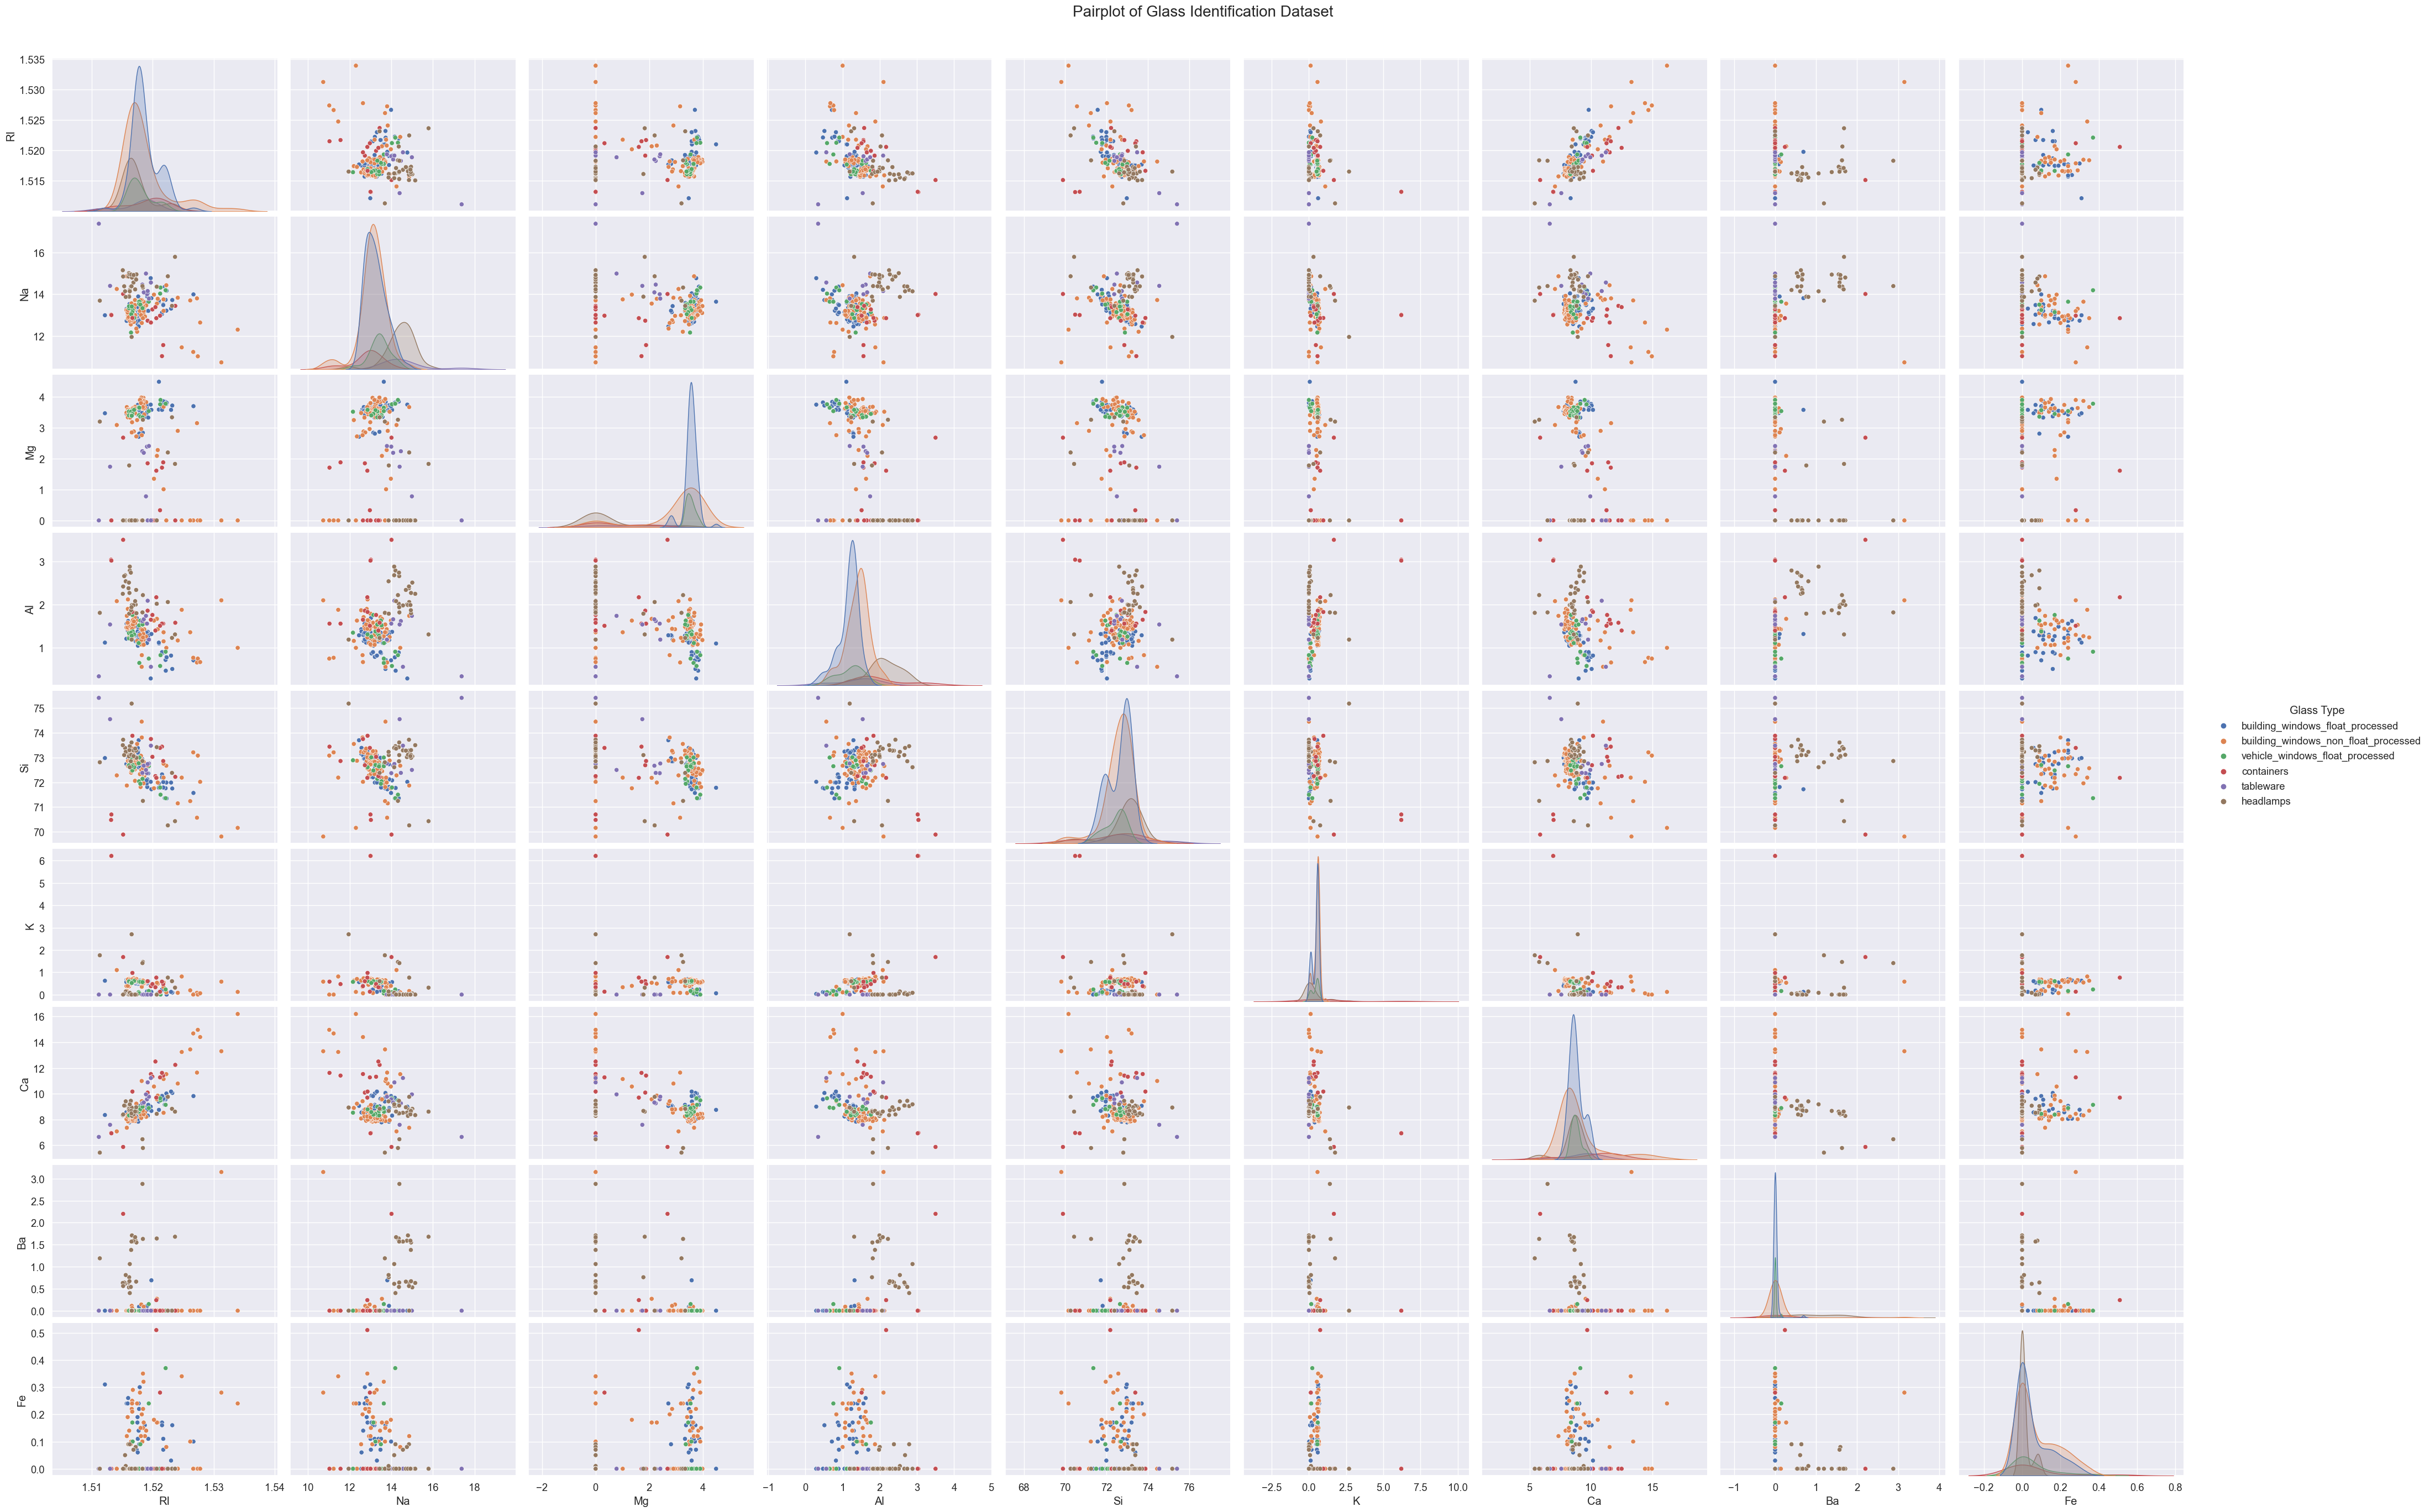

In [56]:
# Set larger figure size and font size

plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)  # Adjust the font scale

# Create a pairplot with Seaborn's default palette
pairplot = sns.pairplot(data=data, hue='Type', height=3, aspect=1.5)

# Add a title to the pairplot
pairplot.fig.suptitle("Pairplot of Glass Identification Dataset", y=1.02, fontsize=20)

# Customize legend
legend = pairplot._legend
legend.set_title("Glass Type")

# Show the pairplot
plt.show()

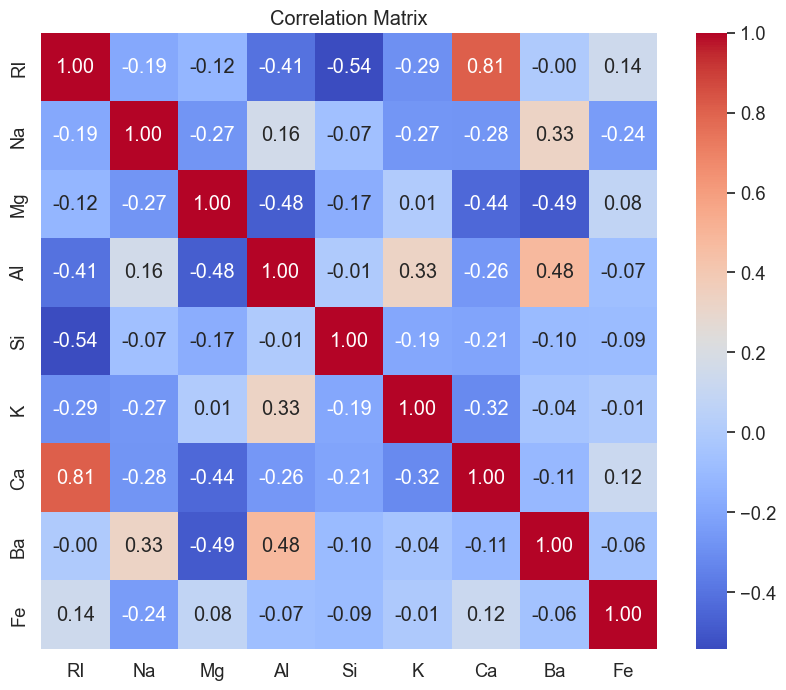

In [57]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

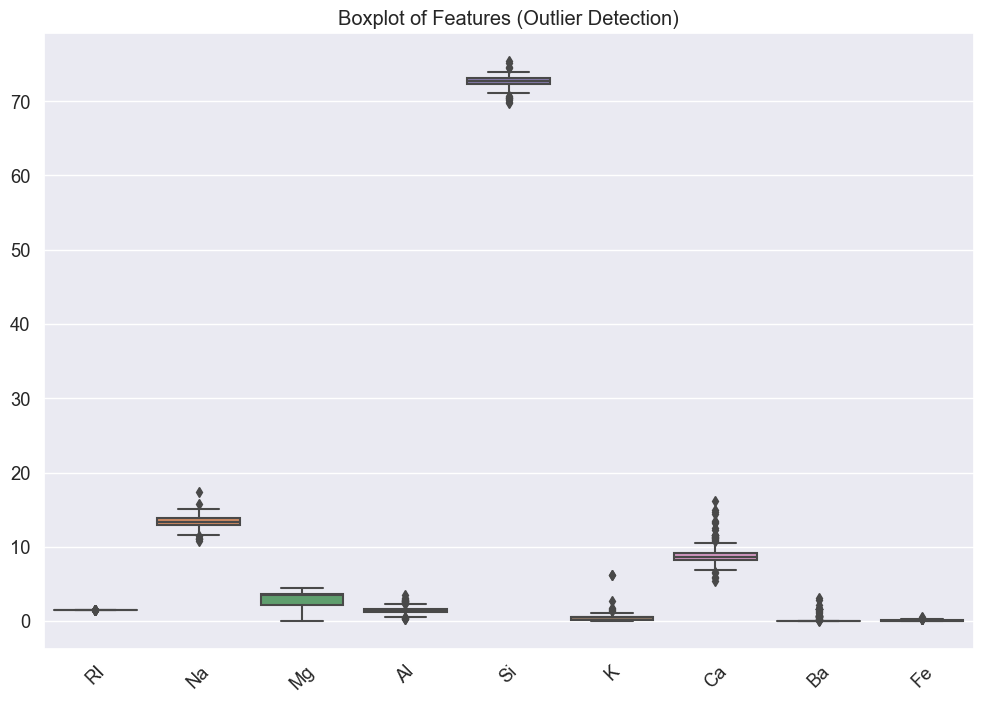

In [65]:
# Detect and visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop('Type', axis=1))
plt.title('Boxplot of Features (Outlier Detection)')
plt.xticks(rotation=45)
plt.show()

In [58]:
# Preprocessing
X = data.drop('Type', axis=1)
y = data['Type']
le = LabelEncoder()
y = le.fit_transform(y)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# Model training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Model evaluation
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       0.90      0.64      0.75        14
           2       1.00      0.75      0.86         4
           3       0.89      1.00      0.94         8
           4       1.00      1.00      1.00         3
           5       1.00      0.67      0.80         3

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43

Confusion Matrix:
 [[11  0  0  0  0  0]
 [ 4  9  0  1  0  0]
 [ 0  1  3  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  3  0]
 [ 1  0  0  0  0  2]]


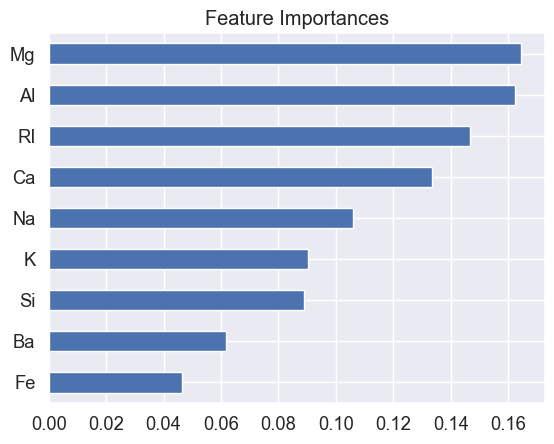

In [63]:
# Visualization
# Feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()